In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf


In [2]:
0pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
train = pd.read_csv('covid_19_data.csv')

In [4]:
train

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0


In [5]:
train.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
confirmed = train.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
...,...,...
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0


In [7]:
Deaths = train.groupby('ObservationDate').sum()['Deaths'].reset_index()
Deaths

,ObservationDate,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
...,...,...
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0


In [8]:
Recovered = train.groupby('ObservationDate').sum()['Recovered'].reset_index()
Recovered

,ObservationDate,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
...,...,...
315,12/02/2020,41496318.0
316,12/03/2020,41932091.0
317,12/04/2020,42352021.0
318,12/05/2020,42789879.0


<AxesSubplot:xlabel='ObservationDate'>

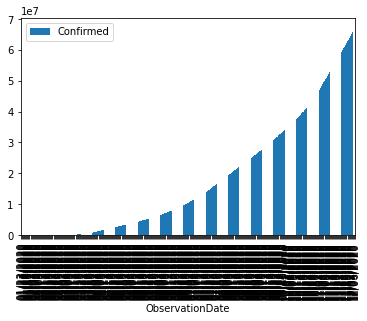

In [9]:
confirmed.plot(kind = 'bar',x ='ObservationDate',y = 'Confirmed')

<AxesSubplot:xlabel='ObservationDate', ylabel='Confirmed'>

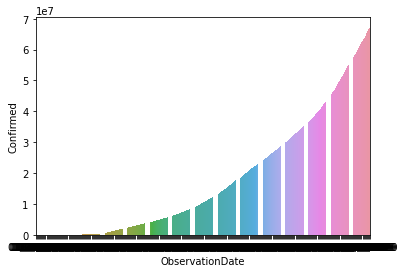

In [10]:
sns.barplot(x=confirmed['ObservationDate'],y=confirmed['Confirmed'])

In [11]:
confirmed.iplot(kind = 'bar',x ='ObservationDate',y = 'Confirmed')

In [12]:
Deaths.iplot(kind ='bar',x='ObservationDate',y='Deaths')

In [13]:
Recovered.iplot(kind ='bar',x='ObservationDate',y='Recovered')

In [14]:
confirmed.columns = ['ds','y']

In [15]:
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0
...,...,...
315,2020-12-02,64530517.0
316,2020-12-03,65221040.0
317,2020-12-04,65899441.0
318,2020-12-05,66540034.0


In [16]:
model = Prophet() 
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = model.make_future_dataframe(periods=120)

In [18]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-4.363278e+04,-6.247620e+05,4.788030e+05,-4.363278e+04,-4.363278e+04,-19373.224903,-19373.224903,-19373.224903,-19373.224903,-19373.224903,-19373.224903,0.0,0.0,0.0,-6.300601e+04
1,2020-01-23,-3.980426e+04,-6.295525e+05,5.261043e+05,-3.980426e+04,-3.980426e+04,4472.161238,4472.161238,4472.161238,4472.161238,4472.161238,4472.161238,0.0,0.0,0.0,-3.533210e+04
2,2020-01-24,-3.597574e+04,-5.718956e+05,5.440861e+05,-3.597574e+04,-3.597574e+04,36869.399029,36869.399029,36869.399029,36869.399029,36869.399029,36869.399029,0.0,0.0,0.0,8.936565e+02
3,2020-01-25,-3.214722e+04,-5.902045e+05,6.074275e+05,-3.214722e+04,-3.214722e+04,42297.285330,42297.285330,42297.285330,42297.285330,42297.285330,42297.285330,0.0,0.0,0.0,1.015006e+04
4,2020-01-26,-2.831870e+04,-5.587104e+05,6.163308e+05,-2.831870e+04,-2.831870e+04,16366.251624,16366.251624,16366.251624,16366.251624,16366.251624,16366.251624,0.0,0.0,0.0,-1.195245e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-04-01,1.234178e+08,1.135949e+08,1.330742e+08,1.137543e+08,1.328711e+08,4472.161238,4472.161238,4472.161238,4472.161238,4472.161238,4472.161238,0.0,0.0,0.0,1.234223e+08
436,2021-04-02,1.239181e+08,1.142528e+08,1.335337e+08,1.141134e+08,1.334865e+08,36869.399029,36869.399029,36869.399029,36869.399029,36869.399029,36869.399029,0.0,0.0,0.0,1.239550e+08
437,2021-04-03,1.244184e+08,1.144976e+08,1.341858e+08,1.144738e+08,1.341514e+08,42297.285330,42297.285330,42297.285330,42297.285330,42297.285330,42297.285330,0.0,0.0,0.0,1.244607e+08
438,2021-04-04,1.249187e+08,1.149285e+08,1.349002e+08,1.148420e+08,1.347470e+08,16366.251624,16366.251624,16366.251624,16366.251624,16366.251624,16366.251624,0.0,0.0,0.0,1.249351e+08


In [19]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-6.300601e+04,-6.247620e+05,4.788030e+05
1,2020-01-23,-3.533210e+04,-6.295525e+05,5.261043e+05
2,2020-01-24,8.936565e+02,-5.718956e+05,5.440861e+05
3,2020-01-25,1.015006e+04,-5.902045e+05,6.074275e+05
4,2020-01-26,-1.195245e+04,-5.587104e+05,6.163308e+05
...,...,...,...,...
435,2021-04-01,1.234223e+08,1.135949e+08,1.330742e+08
436,2021-04-02,1.239550e+08,1.142528e+08,1.335337e+08
437,2021-04-03,1.244607e+08,1.144976e+08,1.341858e+08
438,2021-04-04,1.249351e+08,1.149285e+08,1.349002e+08


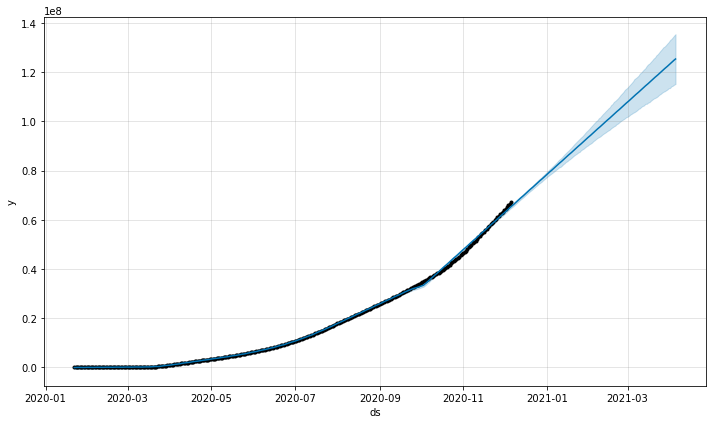

In [20]:
confirmed_cases = model.plot(forecast)

In [21]:
Deaths.columns = ['ds','y']

In [22]:
Deaths['ds']= pd.to_datetime(Deaths['ds'])
Deaths

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0
...,...,...
315,2020-12-02,1493742.0
316,2020-12-03,1506260.0
317,2020-12-04,1518670.0
318,2020-12-05,1528868.0


In [23]:
model = Prophet() 
model.fit(Deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = model.make_future_dataframe(periods=120)

In [25]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.126672e+03,-1.272302e+04,1.056966e+04,-1.126672e+03,-1.126672e+03,-197.808865,-197.808865,-197.808865,-197.808865,-197.808865,-197.808865,0.0,0.0,0.0,-1.324481e+03
1,2020-01-23,-1.015716e+03,-1.371504e+04,1.171784e+04,-1.015716e+03,-1.015716e+03,648.650595,648.650595,648.650595,648.650595,648.650595,648.650595,0.0,0.0,0.0,-3.670654e+02
2,2020-01-24,-9.047596e+02,-1.238583e+04,1.287939e+04,-9.047596e+02,-9.047596e+02,1367.879932,1367.879932,1367.879932,1367.879932,1367.879932,1367.879932,0.0,0.0,0.0,4.631203e+02
3,2020-01-25,-7.938033e+02,-1.132758e+04,1.269215e+04,-7.938033e+02,-7.938033e+02,1229.328651,1229.328651,1229.328651,1229.328651,1229.328651,1229.328651,0.0,0.0,0.0,4.355254e+02
4,2020-01-26,-6.828469e+02,-1.250079e+04,1.152471e+04,-6.828469e+02,-6.828469e+02,-64.890284,-64.890284,-64.890284,-64.890284,-64.890284,-64.890284,0.0,0.0,0.0,-7.477372e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-04-01,2.372857e+06,2.169165e+06,2.568936e+06,2.170481e+06,2.567628e+06,648.650595,648.650595,648.650595,648.650595,648.650595,648.650595,0.0,0.0,0.0,2.373506e+06
436,2021-04-02,2.380434e+06,2.176596e+06,2.579039e+06,2.174505e+06,2.578337e+06,1367.879932,1367.879932,1367.879932,1367.879932,1367.879932,1367.879932,0.0,0.0,0.0,2.381802e+06
437,2021-04-03,2.388010e+06,2.179943e+06,2.593920e+06,2.180045e+06,2.589047e+06,1229.328651,1229.328651,1229.328651,1229.328651,1229.328651,1229.328651,0.0,0.0,0.0,2.389240e+06
438,2021-04-04,2.395587e+06,2.182681e+06,2.601639e+06,2.183679e+06,2.599619e+06,-64.890284,-64.890284,-64.890284,-64.890284,-64.890284,-64.890284,0.0,0.0,0.0,2.395522e+06


In [26]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1.324481e+03,-1.272302e+04,1.056966e+04
1,2020-01-23,-3.670654e+02,-1.371504e+04,1.171784e+04
2,2020-01-24,4.631203e+02,-1.238583e+04,1.287939e+04
3,2020-01-25,4.355254e+02,-1.132758e+04,1.269215e+04
4,2020-01-26,-7.477372e+02,-1.250079e+04,1.152471e+04
...,...,...,...,...
435,2021-04-01,2.373506e+06,2.169165e+06,2.568936e+06
436,2021-04-02,2.381802e+06,2.176596e+06,2.579039e+06
437,2021-04-03,2.389240e+06,2.179943e+06,2.593920e+06
438,2021-04-04,2.395522e+06,2.182681e+06,2.601639e+06


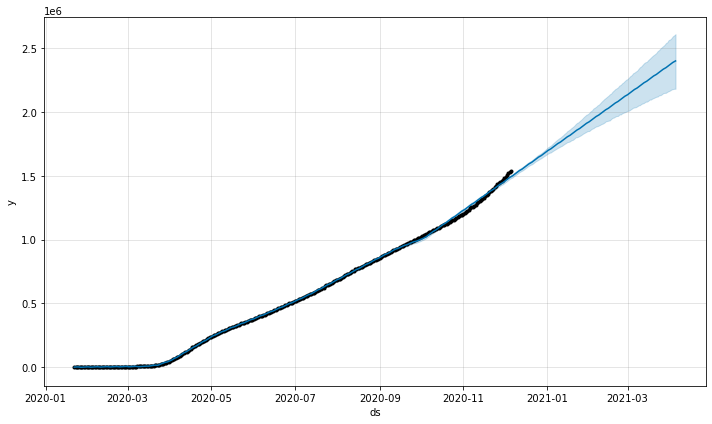

In [27]:
Death_cases = model.plot(forecast)

In [28]:
Recovered.columns = ['ds','y']

In [29]:
Recovered['ds']= pd.to_datetime(Recovered['ds'])
Recovered

,ds,y
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0
...,...,...
315,2020-12-02,41496318.0
316,2020-12-03,41932091.0
317,2020-12-04,42352021.0
318,2020-12-05,42789879.0


In [30]:
model = Prophet()
model.fit(Recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = model.make_future_dataframe(periods=120)
forecast = model.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-4.340421e+04,-4.624720e+05,3.345305e+05,-4.340421e+04,-4.340421e+04,6339.755734,6339.755734,6339.755734,6339.755734,6339.755734,6339.755734,0.0,0.0,0.0,-3.706446e+04
1,2020-01-23,-4.098440e+04,-4.581673e+05,3.537026e+05,-4.098440e+04,-4.098440e+04,8697.854233,8697.854233,8697.854233,8697.854233,8697.854233,8697.854233,0.0,0.0,0.0,-3.228654e+04
2,2020-01-24,-3.856459e+04,-4.469373e+05,3.769515e+05,-3.856459e+04,-3.856459e+04,-2773.118683,-2773.118683,-2773.118683,-2773.118683,-2773.118683,-2773.118683,0.0,0.0,0.0,-4.133771e+04
3,2020-01-25,-3.614477e+04,-4.035513e+05,3.919176e+05,-3.614477e+04,-3.614477e+04,20854.071377,20854.071377,20854.071377,20854.071377,20854.071377,20854.071377,0.0,0.0,0.0,-1.529070e+04
4,2020-01-26,-3.372496e+04,-4.360929e+05,3.464523e+05,-3.372496e+04,-3.372496e+04,7154.816539,7154.816539,7154.816539,7154.816539,7154.816539,7154.816539,0.0,0.0,0.0,-2.657015e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-04-01,7.398816e+07,6.969046e+07,7.821275e+07,6.974423e+07,7.823627e+07,8697.854233,8697.854233,8697.854233,8697.854233,8697.854233,8697.854233,0.0,0.0,0.0,7.399686e+07
436,2021-04-02,7.426791e+07,7.000090e+07,7.862131e+07,6.997516e+07,7.858628e+07,-2773.118683,-2773.118683,-2773.118683,-2773.118683,-2773.118683,-2773.118683,0.0,0.0,0.0,7.426513e+07
437,2021-04-03,7.454765e+07,7.019436e+07,7.890431e+07,7.019697e+07,7.893220e+07,20854.071377,20854.071377,20854.071377,20854.071377,20854.071377,20854.071377,0.0,0.0,0.0,7.456850e+07
438,2021-04-04,7.482739e+07,7.040528e+07,7.930822e+07,7.043891e+07,7.927036e+07,7154.816539,7154.816539,7154.816539,7154.816539,7154.816539,7154.816539,0.0,0.0,0.0,7.483455e+07


In [34]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-3.706446e+04,-4.624720e+05,3.345305e+05
1,2020-01-23,-3.228654e+04,-4.581673e+05,3.537026e+05
2,2020-01-24,-4.133771e+04,-4.469373e+05,3.769515e+05
3,2020-01-25,-1.529070e+04,-4.035513e+05,3.919176e+05
4,2020-01-26,-2.657015e+04,-4.360929e+05,3.464523e+05
...,...,...,...,...
435,2021-04-01,7.399686e+07,6.969046e+07,7.821275e+07
436,2021-04-02,7.426513e+07,7.000090e+07,7.862131e+07
437,2021-04-03,7.456850e+07,7.019436e+07,7.890431e+07
438,2021-04-04,7.483455e+07,7.040528e+07,7.930822e+07


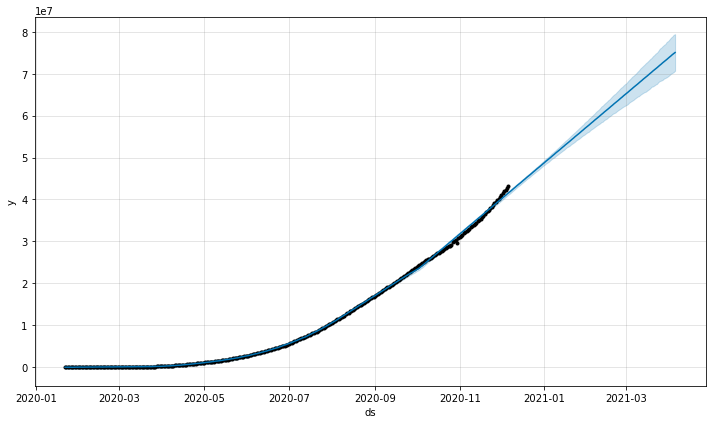

In [35]:
Recovered_cases = model.plot(forecast)